In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.stats import linregress
import os
from netCDF4 import Dataset 

In [4]:
# Import and apply style file for plots
plt.style.use("mpl.style")

In [5]:
#Compile all filenames (value) and properties (key) into a dictionary
def generate_file_names(filepath):
    data_files = {}

    for file in os.listdir(filepath):

        #Remove the .nc extension
        #Collect the info for the run in an array
        file_info = file.split(".")
        file_info = file_info[0].split("_")

        #File name
        file_name = file

        #Add the files to datafiles dictionary
        data_files[(file_info[0],file_info[1],file_info[2])]= filepath + "/" + file_name
    return data_files

In [15]:
#System dimensions
outer_R = 10
R = 9

#Scaling parameters
sf = 0.25
nb =1
n = nb/sf**2

#External Force
f_ext = 1e-2/n

#Viscosity parameters
eta = 1
gd0 = 1e-3
npow=0.5
k = eta*gd0**(1-npow)
model = "power"

#Avg velocity at channel exit u_z(r,z=0) for non-dimensionalization (function of R only)
u_z_0 = 5/3/R*(R-(3/5)*R**(5/3))

#Compressibility
target_B = 0.01 #Incompressible: 0, weakly compressible: 0.01, compressible: 0.1 
beta = target_B/k*(R/u_z_0)**npow #Isothermal compressibility factor
B = beta*k*(u_z_0/R)**npow #Compressibility number

frame = -1

In [7]:
filepath = '/home/epalermo/dev/test/poiseuille_flow/1_2_4.nc'
ds = Dataset(filepath)

In [11]:
#Analytical solution for Newtonian Poiseuille Flow in 2D rectangular channel 
def calc_analytical_profile(r,z,t,model):
    r_0 = 2*Bn/F_ext

    if model == "constant":
        u_z = 0.5/(eta*inner_R**2)*(1-(r/inner_R)**2) #velocity is a function of r
        f = f_ext*t #external force is a function of t
    elif model == "power":
        #Velocity averaged over r at the channel exit (z=0)
        
        #For a pressure driven flow
#         p = 1/B/n*np.log(1-2*n*(1/n+3)**n*B*z) #Pressure as a function of z
#         u_z_num = ((3*n+1)*(1-r**(1/(n+1)))) #z-component of velocity as a function of r and z
#         u_z_denom = (n+1)*(1-2*n*(1/(n+3))**n*B*z)**(1/n)
#         u_z = u_z_num/u_z_denom
        
        u_z = n/(2**(1/n)*(n+1))
        f = f_ext*t 
        
    return u_z*f**(1/n)

#Analytical solution for Newtonian Poiseuille Flow in 2D cylindrical channel 
# def calc_analytical_profile(r,t):
#     u_x = 0.25/eta*(inner_R**2-r**2) #velocity is a function of r
#     f = f_ext*t #external force is a function of t
#     return u_x*f

#u_z_ref = calc_analytical_profile(r, t_step)

In [175]:
#list of all atoms
atom_ids = (ds["id"][frame])
#list of flow atoms
flow_atom_ids = []

#iterate over each atom
for count, atom in enumerate(atom_ids):
    if ds["type"][frame,atom-1]==1:
        flow_atom_ids.append(atom)


t_dump = ds["time"][frame]
t_step = 500*t_dump

u_x = np.zeros(shape=len(flow_atom_ids))
r = np.zeros(shape=len(flow_atom_ids))
for count, atom in enumerate(flow_atom_ids):
    r[count] = ds["coordinates"][frame,atom-1,1]
    u_x[count] = ds["velocities"][frame,atom-1,0]




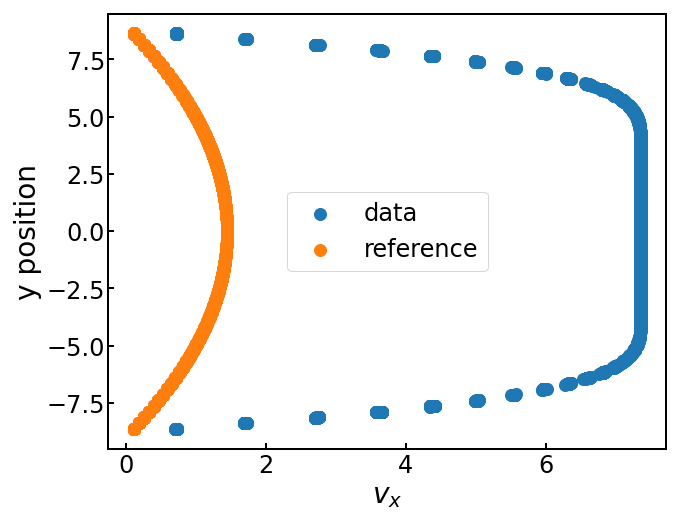

In [176]:
plt.scatter(u_x,r, label="data")
plt.scatter(u_x_ref,r,label="reference")
plt.scatter
plt.xlabel(r"$v_x$")
plt.ylabel("y position")
plt.legend()

In [8]:
py

75